## Practice: Linear regression from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate data

In [84]:
np.random.seed(0) # fix the seed for reproducibility

mean = [-1, 1] # mean of normal  distribution. Try others
cov = [[1, -0.75],
       [-0.75, 1]] # covariance of normal distribution

sample = np.random.multivariate_normal(mean, cov, size = 1000) # 1000 normally distributed samples
# TODO: compare with normalized normal distribution; also with other distributions; also add outliers

In [85]:
# add abnormal data

# 5 new points 
new_array = np.random.randint([-10, -5],[-4, 2], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
# 5 new points 
new_array = np.random.randint([0, 2],[10, 6], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
sample

array([[-2.50864293,  2.79159681],
       [-1.12325016,  2.70780094],
       [-3.09246045,  2.40142063],
       ...,
       [ 7.        ,  5.        ],
       [ 6.        ,  3.        ],
       [ 8.        ,  3.        ]])

Create and visualize dataset

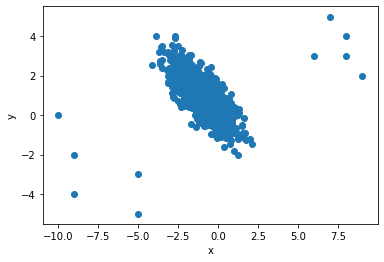

In [86]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [87]:
# Add singular bias feature
X = np.array([np.array([1,val]) for val in x])
X[:5], y[:5]

(array([[ 1.        , -2.50864293],
        [ 1.        , -1.12325016],
        [ 1.        , -3.09246045],
        [ 1.        , -1.94223919],
        [ 1.        , -0.75827911]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [88]:
X.shape, y.shape

((1010, 2), (1010,))

### Define model

Prediction function $y = \theta^Tx$:

In [89]:
def predict(X, theta):
    return np.dot(X,theta)

Cost function as normalized sum of errors on the dataset: $J(\theta) = \frac{1}{2n} \sum\limits_{i=1}^n(y-h_\theta(X))^2$

In [90]:
def computeCost(X, y, theta):
    return sum((y-predict(X, theta))**2) / (2*len(X))

Let's visualize cost function surface in 3d space. For this compute cost function value for a grid-shaped set of theta:

In [91]:
size = 100 # amount of tries for each parameter
limits = (-10,10) # range of values for each parameter
error = np.zeros((size,size)) # empty matrix of errors
for i,w in enumerate(np.linspace(*limits,size)): # for each theta[0] component
    for j,b in enumerate(np.linspace(*limits,size)): # for each theate[1] component
        error[i,j] = computeCost(X, y, np.array([w,b])) # compute cost for each theta

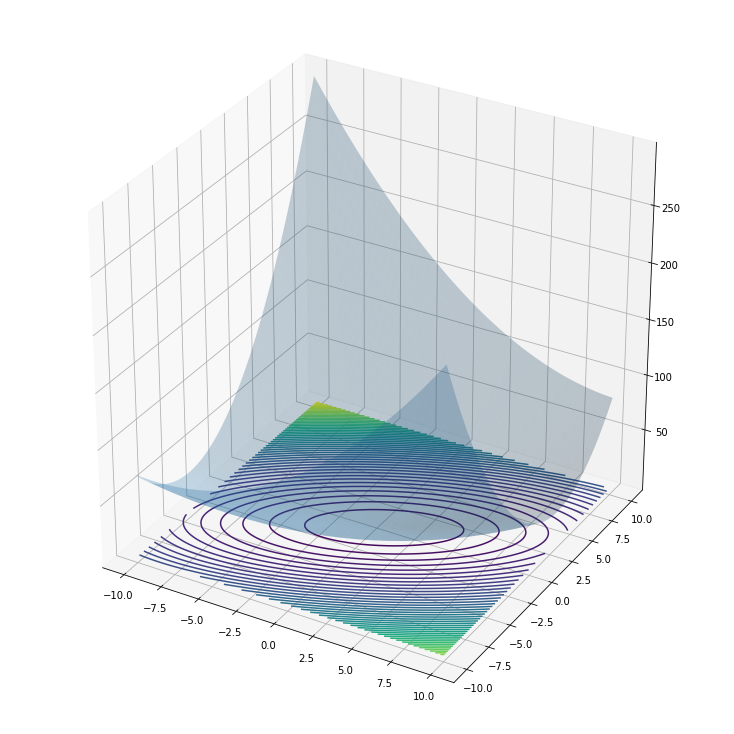

In [104]:
# initialize figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

# create 2d array for each index 
L,K = np.meshgrid(np.linspace(*limits,size),np.linspace(*limits,size))

ax.plot_surface(K,L,Z = error, alpha = 0.25) # plot cost function surface in 3d
plt.contour(K,L,error,50, offset = 0) # plot cost function 2d-projection

## Learn model

Define learning algorithm

Simple gradient descent algorithm: 

$\theta = \theta + \alpha \nabla J(\theta)$

$\nabla J(\theta) = \sum_m(y - h_\theta(X))X$

In [105]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
    #     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    m = len(X)
    history = [] # list of theta values on each iteration 
    cost = [] # list of cost function values on each iteration
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        theta = theta + alpha * (np.sum((y - np.dot(X, theta.T)) * X.T, axis = 1))
        
    return theta, np.array(cost), np.array(history)

Initialize learning

In [106]:
alpha = 0.0001
iters = 100

Learn model

In [107]:
w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization

In [108]:
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

Model`s cost: 0.4493675388915126
Calculated weights:  [ 0.6965574  -0.29831165]


### Check (0,0) solution:

In [109]:
ww = [0,0]
print("Model's cost: ", computeCost(X, y, ww))

Model's cost:  0.9961945927261747


### Visualize model

[-10.   9.]


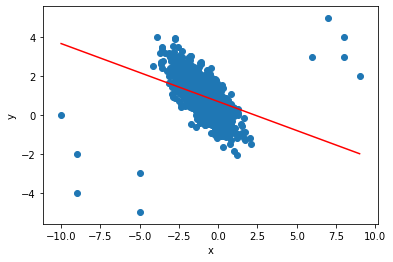

In [110]:
extremes = np.array([np.min(x), np.max(x)])
line = w[0] + extremes * w[1]
print(extremes)
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Visualize learning process

Cost function:

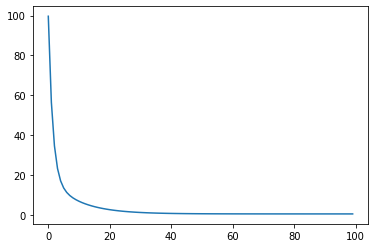

In [111]:
plt.plot(cost)

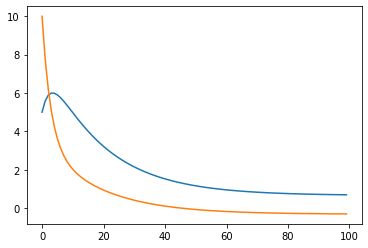

In [112]:
plt.plot(history)

Model's trajectory in parameter's space

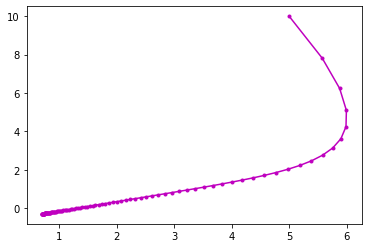

In [113]:
# plt.coutour(K, L, error, 50)
plt.plot(history[:,0], history[:,1], 'm.-')

Model's trajectory on cost function surface:

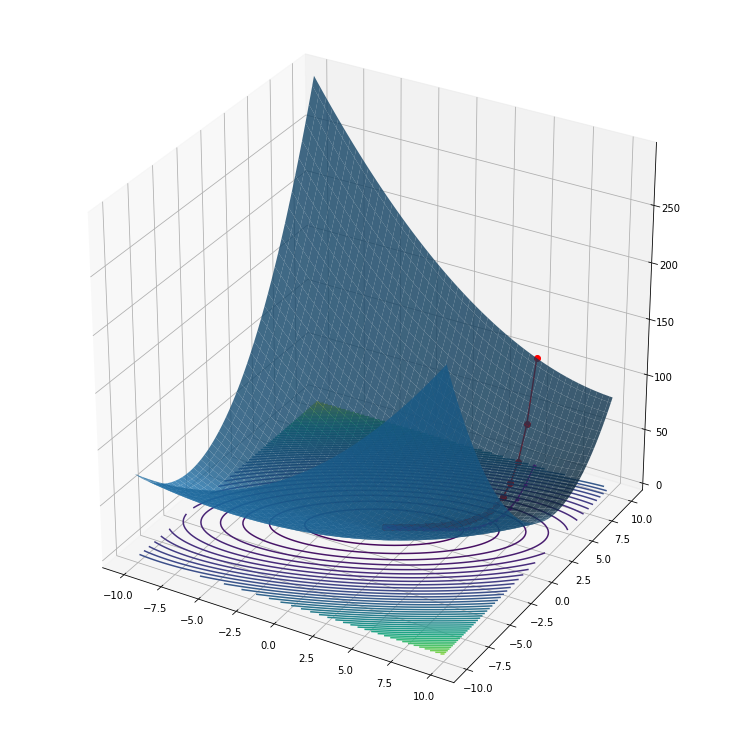

In [114]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

### Let`s try to find optimal iters count

In [115]:
iters = 10
alpha = 0.0002
cost_history_hp = [0]
while True:
    w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization
    
    print(iters, alpha, computeCost(X, y, w))
    iters = iters+10
    if (cost_history_hp[-1] - computeCost(X, y, w))**2<=0.00001:
        break
    
    cost_history_hp.append(computeCost(X, y, w))
    
    
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

10 0.0002 2.4456942637282713
20 0.0002 0.6634129059910726
30 0.0002 0.4720286605407578
40 0.0002 0.45147750291545563
50 0.0002 0.4492706855322056
Model`s cost: 0.4492706855322056
Calculated weights:  [ 0.69174223 -0.30067304]


# Conclusions
If data contains abnormal data in not big range we can try to choose count of iterations and step of GD and try to find min value of cost func

That means GD trying to understand emissions as the result we have bad general predictions that was better with clean normal distribution.

For escaping that - before modeling we need clean data from abnormal data(and normalize in real life, because when we have more than one feature thay can be it different range)